<h1>Understanding Gradient Descent</h1>

In [1]:
from sklearn.datasets import make_regression
import numpy as np 
np.random.seed(42)

x, y = make_regression(
    n_samples=100,     
    n_features=1,       
    noise=20,
    random_state=42
)

In [2]:
initial_guess = np.array([[2.0],[3.0]])
initial_guess.shape

(2, 1)

[]

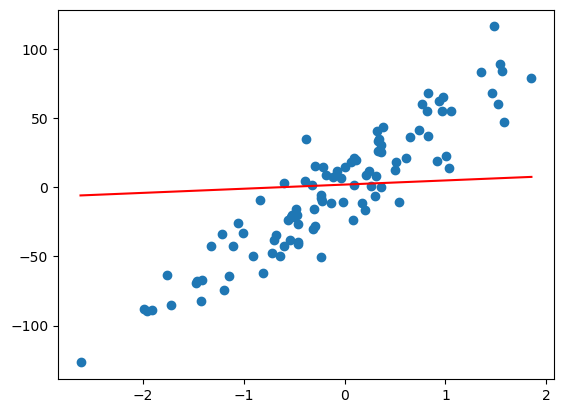

In [3]:
import matplotlib.pyplot as plt 

plt.scatter(x,y)

#Here's I've created a line with supposed gradients and bias
x_line = np.linspace(x.min(), x.max(), 100) 
y_line = initial_guess[1] * x_line + initial_guess[0] 

plt.plot(x_line, y_line,color='red')
plt.plot()

In [4]:
x_new = np.c_[np.ones(x.shape[0]), x]  
x_new

array([[ 1.        ,  0.93128012],
       [ 1.        ,  0.08704707],
       [ 1.        , -1.05771093],
       [ 1.        ,  0.31424733],
       [ 1.        , -0.47917424],
       [ 1.        ,  0.64768854],
       [ 1.        , -0.46341769],
       [ 1.        ,  0.54256004],
       [ 1.        ,  0.61167629],
       [ 1.        ,  1.0035329 ],
       [ 1.        ,  0.8219025 ],
       [ 1.        ,  1.53803657],
       [ 1.        ,  0.73846658],
       [ 1.        , -0.21967189],
       [ 1.        , -0.8084936 ],
       [ 1.        ,  0.09176078],
       [ 1.        , -1.95967012],
       [ 1.        ,  0.51326743],
       [ 1.        ,  1.03099952],
       [ 1.        , -2.6197451 ],
       [ 1.        ,  0.49671415],
       [ 1.        ,  0.09707755],
       [ 1.        , -0.46572975],
       [ 1.        ,  0.91540212],
       [ 1.        ,  1.56464366],
       [ 1.        ,  1.46564877],
       [ 1.        , -0.60063869],
       [ 1.        , -0.03582604],
       [ 1.        ,

In [5]:
y_new = y.reshape(-1,1)
y_new

array([[ 6.26872020e+01],
       [-2.37639807e+01],
       [-2.56867658e+01],
       [ 7.93645654e+00],
       [-1.54754945e+01],
       [ 3.60939588e+01],
       [-4.07942011e+01],
       [-1.08230392e+01],
       [ 2.14147070e+01],
       [ 2.27986221e+01],
       [ 3.72243519e+01],
       [ 8.95671291e+01],
       [ 4.15511282e+01],
       [ 1.50182931e+01],
       [-6.18755179e+01],
       [ 2.14036667e+01],
       [-8.91095732e+01],
       [ 1.86789111e+01],
       [ 1.42342255e+01],
       [-1.26703865e+02],
       [ 1.28230663e+01],
       [ 1.56947595e+00],
       [-3.92917960e+01],
       [ 1.89495791e+01],
       [ 8.41206595e+01],
       [ 6.79742116e+01],
       [ 3.03278631e+00],
       [ 6.99430659e+00],
       [-4.27287124e+01],
       [-7.42680785e+01],
       [ 2.56654717e+01],
       [ 4.33623631e+01],
       [ 6.37427951e-01],
       [-2.12731725e+01],
       [-4.93961082e+01],
       [-1.62402661e+01],
       [-2.79165108e+01],
       [ 7.14971057e-02],
       [ 6.8

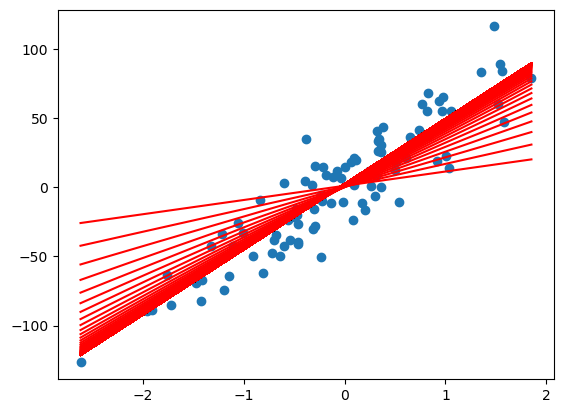

In [6]:
m = 100
x_transpose = x_new.T


import matplotlib.pyplot as plt 

plt.scatter(x,y)
plt.plot()

for i in range(10000): 

    #initial prediction
    y_pred = x_new.dot(initial_guess)

    # calculate error 
    # partial diff with respect to weight =  (2/m) (error)(x)
    # partial diff with respect to bias   =  (2/m) (error)
    # in the above equation error = (y_pred - y)

    # x is organized [[1,value1],[1,value2],....], we need to change this to [[1,1,1,1,....], [value1,value2,value3....]]
    
    error = y_pred-y_new

    # graident is array with 2 values 
    # [1*all_errors, value1(x1)*errors], we would not require to transpose if we were doing this individually
    gradient = (2/m)*(x_transpose.dot(error))

    # initial_guess and gradient have similar shape (2,1)
    initial_guess -= 0.1 * gradient
    
    #Here's I've created a line with supposed gradients and bias
    x_line = np.linspace(x.min(), x.max(), 100) 
    y_line = initial_guess[1] * x_line + initial_guess[0] 

    plt.plot(x_line, y_line,color='red')


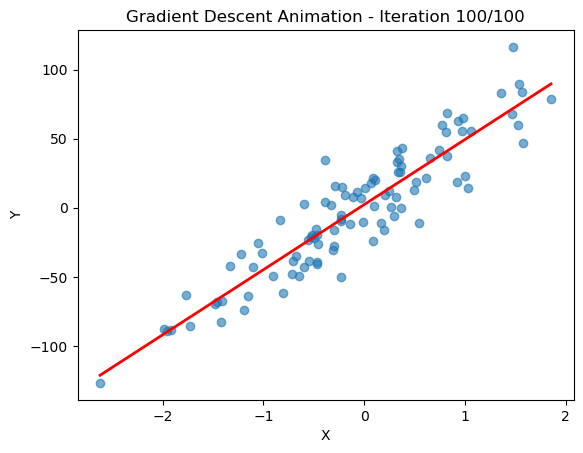

In [7]:
from IPython.display import clear_output
import time

# Reset initial guess for animation
initial_guess_anim = np.array([[2.0],[3.0]])

plt.figure(figsize=(10, 6))

for i in range(100):
    # Calculate prediction and gradient
    y_pred = x_new.dot(initial_guess_anim)
    error = y_pred - y_new
    gradient = (2/m) * (x_transpose.dot(error))
    initial_guess_anim -= 0.1 * gradient
    
    # Clear previous plot
    clear_output(wait=True)
    
    # Plot scatter points
    plt.clf()
    plt.scatter(x, y, alpha=0.6)
    
    # Plot current fitted line
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = initial_guess_anim[1] * x_line + initial_guess_anim[0]
    plt.plot(x_line, y_line, color='red', linewidth=2)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Gradient Descent Animation - Iteration {i+1}/100')
    plt.show()
    
    time.sleep(0.05)  # Add small delay to see animation

## Mathematical Foundation of Gradient Descent

### Loss Function (Mean Squared Error)

The loss function measures the average squared difference between predictions and actual values:

$$f = \frac{1}{m} \sum_{i=1}^{m} (y_{\text{pred}} - y_{\text{actual}})^2 \quad \text{...[i]}$$

where $m$ is the number of samples.

---

### Linear Prediction Model

The prediction is based on a linear relationship:

$$y_{\text{pred}} = w \cdot x + b \quad \text{...[ii]}$$

where:
- $w$ is the **weight** (also known as slope)
- $b$ is the **bias** (also known as y-intercept)

For simplicity, let's denote: $w = \theta_1$ and $b = \theta_0$

$$y_{\text{pred}} = \theta_1 \cdot x + \theta_0$$

---

### Combined Loss Function

Substituting equation [ii] into equation [i]:

$$f(\theta_1, \theta_0) = \frac{1}{m} \sum_{i=1}^{m} (\theta_1 x_i + \theta_0 - y_i)^2$$

---

### Gradient Computation (Partial Derivatives)

To minimize the loss function, we compute partial derivatives with respect to each parameter:

**Gradient with respect to weight ($\theta_1$):**

$$\frac{\partial f}{\partial \theta_1} = \frac{2}{m} \sum_{i=1}^{m} \text{error}_i \cdot x_i$$

**Gradient with respect to bias ($\theta_0$):**

$$\frac{\partial f}{\partial \theta_0} = \frac{2}{m} \sum_{i=1}^{m} \text{error}_i$$

where: $\text{error}_i = (y_{\text{pred},i} - y_{\text{actual},i})$

---

### Parameter Update Rule

The parameters are updated iteratively using:

$$\theta_1 := \theta_1 - \alpha \cdot \frac{\partial f}{\partial \theta_1}$$

$$\theta_0 := \theta_0 - \alpha \cdot \frac{\partial f}{\partial \theta_0}$$

where $\alpha$ is the learning rate.